## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from fractions import Fraction
import pickle
import os
from matplotlib.ticker import FormatStrFormatter
import sys
from helper_functions import datamaker, exp_analytical_data



In [2]:
current_directory = str(os.getcwd())


In [3]:
from matplotlib import style
style.use('default')


## Data for M31 and M33

In [4]:
pc_kpc = 1e3  # number of pc in one kpc
cm_km = 1e5  # number of cm in one km
s_day = 24*3600  # number of seconds in one day
s_min = 60  # number of seconds in one hour
s_hr = 3600  # number of seconds in one hour
cm_Rsun = 6.957e10  # solar radius in cm
g_Msun = 1.989e33  # solar mass in g
cgs_G = 6.674e-8
cms_c = 2.998e10
g_mH = 1.6736e-24
g_me = 9.10938e-28
cgs_h = 6.626e-27
deg_rad = 180e0/np.pi
arcmin_deg = 60e0
arcsec_deg = 3600e0
cm_kpc = 3.086e+21  # number of centimeters in one parsec
s_Myr = 1e+6*(365*24*60*60)  # megayears to seconds


In [5]:
# os.chdir(current_directory + '\data')

# with open('data_m31.pickle', 'rb') as f:
#     data_m31 = pickle.load(f)
# with open('data_m33.pickle', 'rb') as f:
#     data_m33 = pickle.load(f)
# kpc_r, dat_sigmatot, dat_sigma, dat_q, dat_omega, dat_sigmasfr, molfrac = data_m31

os.chdir(current_directory + '\data')

with open('zip_data.pickle', 'rb') as f:
    kpc_r, data_pass = pickle.load(f)
r = kpc_r.size

dat_sigmatot, dat_sigma, dat_sigmasfr, dat_q, dat_omega, zet, T, psi, bet, ca, rk, mu = (
    np.array([data_pass[i][j] for i in range(r)]) for j in range(len(data_pass[0])))


In [6]:
# Defining the Observables
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')
mach = Symbol('M')
E51 = Symbol('E_51')
Rk = Symbol('R_k')
zet = Symbol('zeta')
psi = Symbol('psi')
kalpha = Symbol('K_alpha')
bet = Symbol('beta')

# Defining the general parameters
u = Symbol('u')
tau = Symbol('tau')
l = Symbol('l')
h = Symbol('h')


# Defining the expressions
cs = (gamma*boltz*T/(mu*mh))**Rational(1/2)
# Ralpha = alphak*h/eta
# Romega = -q*omega*h**2/eta


In [7]:
os.chdir(current_directory + '\expressions')
with open('turb_exp.pickle', 'rb') as f:
    hg, rho, nu, u, l, taue, taur, alphak1, alphak2, alphak3 = pickle.load(f)

with open('mag_exp.pickle', 'rb') as f:
    biso, bani, Bbar, tanpb, tanpB, Beq, eta, cs = pickle.load(f)


In [8]:
G_dat_Bord = np.array([4.9, 5.2, 4.9, 4.6])
G_dat_Breg = np.array([1.8, 2.1, 2.6, 2.7])
G_dat_Btot = np.array([7.3, 7.5, 7.1, 6.3])
RM_dat_po = np.array([30, 29, 26, 27, 27]) * np.pi/180
err_RM_dat_po = np.array([5, 4, 3, 2, 3]) * np.pi/180
rmdat_tanpo = np.tan(RM_dat_po)
rm_errdat_tanpo = 1/(np.cos(err_RM_dat_po))**2
mrange_endps = np.array([6.8, 9.0, 11.3, 13.6, 15.8])
mrange = (mrange_endps[1:] + mrange_endps[:-1])/2

M_dat_pb = np.array([13, 19, 11, 8]) * np.pi/180
err_M_dat_pb = np.array([4, 3, 3, 3]) * np.pi/180
RM_dat_pb = np.array([4, 9, 7, 7, 5]) * np.pi/180
err_RM_dat_pb = np.array([5, 3, 3, 2, 3]) * np.pi/180
rmdat_tanpb = np.tan(RM_dat_pb)
rm_errdat_tanpb = 1/(np.cos(err_RM_dat_pb))**2
m_errdat_tanpb = 1/(np.cos(err_M_dat_pb))**2

rmrange = np.arange(7.5, 12, 1)
kpc_dat_r = np.array([7, 9, 11, 13])

pc_dat_h = np.array([316.4, 371.9, 437.1, 513.7])


In [9]:
kms_sigmaLOS = np.array([17.10, 8.58, 12.94, 17.12, 12.99, 10.03, 13.13, 15.38, 16.60, 14.95, 15.63, 14.50, 12.63, 12.25, 12.57, 12.51, 13.53, 13.79, 13.93, 13.21, 11.56, 10.87, 10.81, 11.06, 11.77, 11.12, 12.21, 12.12, 12.12, 11.70, 11.41, 11.70, 12.54, 12.15, 11.65, 11.18, 11.21, 11.36, 11.72, 10.62, 10.23, 10.47, 10.62, 10.65, 9.76, 10.82,
                        11.45, 10.92, 10.91, 10.46, 10.01, 10.04, 9.86, 9.94, 10.17, 9.86, 9.55, 9.72, 9.79, 10.15, 9.82, 9.76, 9.86, 9.37, 9.73, 9.58, 9.66, 10.21, 10.21, 9.20, 8.95, 9.59, 10.20, 8.94, 9.01, 9.12, 9.29, 9.46, 9.80, 8.34, 9.01, 8.46, 8.98, 7.70, 7.99, 7.04, 6.43, 5.80, 8.92, 8.76, 6.95, 6.81, 6.60, 9.30, 13.69, 11.38, 6.81, 4.58, 9.05, 10.89])
arcsec_r = np.array([100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0, 4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0, 4900.0, 5000.0,
                    5100.0, 5200.0, 5300.0, 5400.0, 5500.0, 5600.0, 5700.0, 5800.0, 5900.0, 6000.0, 6100.0, 6200.0, 6300.0, 6400.0, 6500.0, 6600.0, 6700.0, 6800.0, 6900.0, 7000.0, 7100.0, 7200.0, 7300.0, 7400.0, 7500.0, 7600.0, 7700.0, 7800.0, 7900.0, 8000.0, 8100.0, 8200.0, 8300.0, 8400.0, 8500.0, 8600.0, 8700.0, 8800.0, 8900.0, 9000.0, 9100.0, 9200.0, 9300.0, 9400.0, 9500.0, 9600.0, 9700.0, 9800.0, 9900.0, 10000.0])

kpc_gal_dist = 780e0  # from Beck et al
kpc_radius = kpc_gal_dist*np.pi/(180*(60*60))*arcsec_r
kms_dat_v = np.sqrt(3)*kms_sigmaLOS


In [10]:
ks_const = (dat_sigmasfr/(dat_sigma)**(1.4)).mean()
dat_sigmasfr2 = ks_const*(dat_sigma)**(1.4)


Text(0, 0.5, '$\\Sigma_{SFR}$ new')

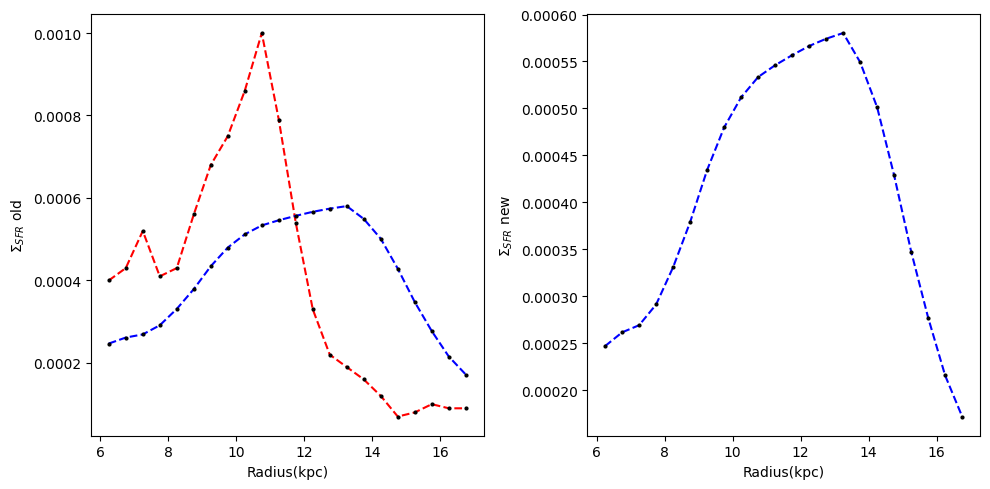

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), tight_layout=True)
# dat_sigma*(cm_kpc**2)/g_Msun   dat_sigmasfr*(cm_kpc**2)*(s_Myr/1e+6)/g_Msun
m = 2
i = 0
ax[i].plot(kpc_r, dat_sigmasfr*(cm_kpc**2)*(s_Myr/1e+6)/g_Msun, c='r',
           linestyle='--', mfc='k', mec='k', markersize=m, marker='o', label=r'$\Sigma$ data')
ax[i].plot(kpc_r, dat_sigmasfr2*(cm_kpc**2)*(s_Myr/1e+6)/g_Msun, c='b', linestyle='--',
           mfc='k', mec='k', markersize=m, marker='o', label=r'$\Sigma_{SFR}$ data')

ax[i].set_xlabel('Radius(kpc)')
ax[i].set_ylabel(r'$\Sigma_{SFR}$ old')

i = 1
ax[i].plot(kpc_r, dat_sigmasfr2*(cm_kpc**2)*(s_Myr/1e+6)/g_Msun, c='b', linestyle='--',
           mfc='k', mec='k', markersize=m, marker='o', label=r'$\Sigma_{SFR}$ data')
ax[i].set_xlabel('Radius(kpc)')
ax[i].set_ylabel(r'$\Sigma_{SFR}$ new')


In [12]:
from scipy.interpolate import griddata
dat_u = griddata(kpc_radius, kms_dat_v, kpc_r, method='linear',
                 fill_value=nan, rescale=False)*1e+5
T_u = (1.67e-24*(14/11)*(dat_u**2))/(1.3807e-16*1.5)

T_tb = (0.017*kpc_r+0.5)*1e+4


In [13]:
os.chdir(current_directory)


In [14]:
# %%cmd
# python get_magnetic_observables.py

In [15]:
os.chdir(current_directory)

with open('mag_observables.pickle', 'rb') as f:
    kpc_r, h_f, l_f, u_f,cs_f, alphak_f, tau_f, biso_f, bani_f, Bbar_f, tanpB_f, tanpb_f = pickle.load(
        f)


In [16]:
alphak = Symbol('alpha_k')
Ralpha = alphak*h/eta
Romega = -q*omega*h**2/eta
Dk = Ralpha*Romega
Dc = -(pi**5)/32


alpham_f = alphak_f*datamaker(((Dc/Dk)-1), data_pass, h_f, tau_f, alphak_f)

alphasat_f = alphak_f + alpham_f

dkdc_f = datamaker((Dk/Dc), data_pass, h_f, tau_f, alphak_f)


In [17]:
from scipy.integrate import quad


def pogen(b, B, pb, pB, s):
    return (np.exp(-b**2/(2*s**2))/(np.sqrt(2*(np.pi))*s))*(1+(2*B*b*np.cos(pb-pB))/(b**2 + B**2))*np.arctan((B*np.sin(pB) + b*np.sin(pb))/((B*np.cos(pB)) + b*np.cos(pb)))


In [18]:
os.chdir(current_directory)
from get_magnetic_observables import omt, kah, taue_f, taur_f

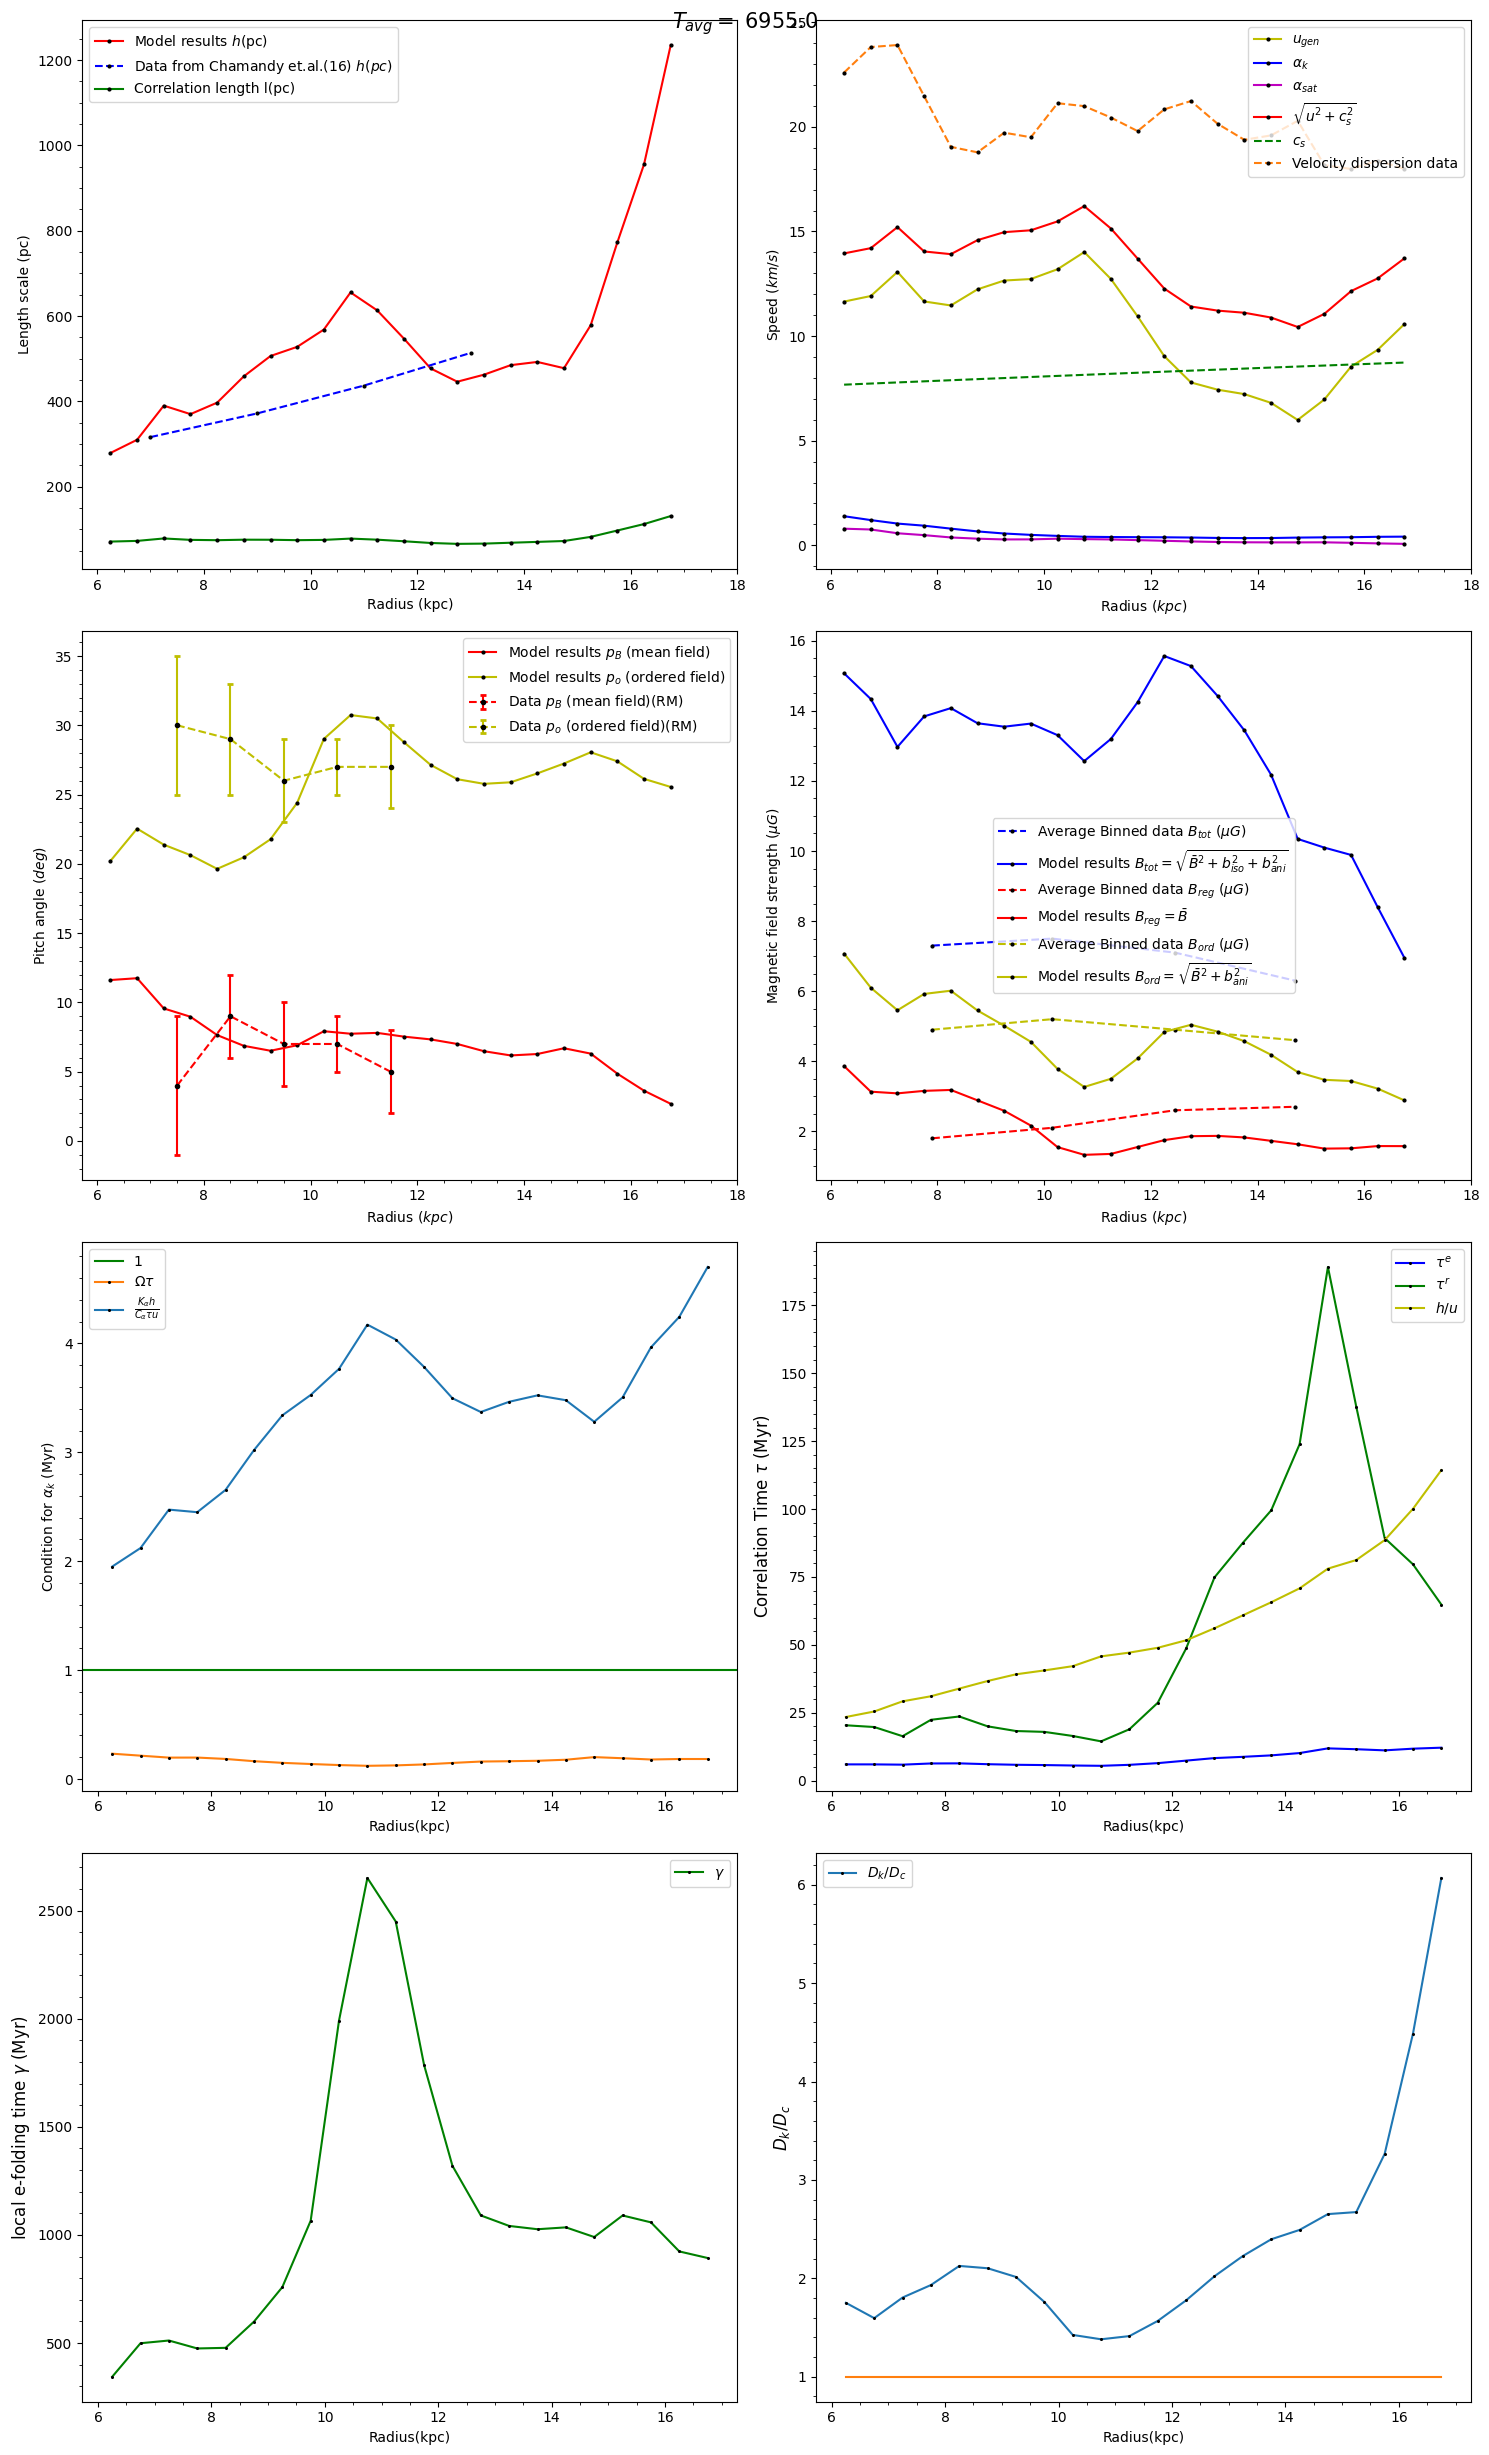

In [19]:
import matplotlib
m = 2
fs = 10
matplotlib.rc('xtick', labelsize=fs)
matplotlib.rc('ytick', labelsize=fs)
matplotlib.ticker.AutoMinorLocator(n=None)
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True


fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 25), tight_layout=True)
i = 0
j = 0
ax[i][j].plot(kpc_r, h_f*pc_kpc/cm_kpc, c='r', linestyle='-', mfc='k',
              mec='k', markersize=m, marker='o', label=r'Model results $h$(pc)')
ax[i][j].plot(kpc_dat_r, pc_dat_h, c='b', linestyle='--', mfc='k', mec='k',
              markersize=m, marker='o', label=r'Data from Chamandy et.al.(16) $h(pc)$')
ax[i][j].plot(kpc_r, l_f*pc_kpc/cm_kpc, c='g',
              linestyle='-', mfc='k', mec='k', markersize=m, marker='o', label=r'Correlation length l(pc)')
# ax[i][j].plot(kpc_r, datamaker(lsn , data_pass, h_f, tau_f)*pc_kpc/cm_kpc,c = 'y',linestyle='--',mfc='k',mec='k', marker='o')
ax[i][j].xaxis.set_ticks(np.arange(6, 20, 2))
ax[i][j].xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax[i][j].set_xlabel(r'Radius (kpc)', fontsize=fs)
ax[i][j].set_ylabel(r'Length scale (pc)', fontsize=fs)
ax[i][j].legend()

j = 1
ax[i][j].plot(kpc_r, u_f/cm_km, color='y', marker='o', mfc='k',
              mec='k', markersize=m, label=r'$u_{gen}$')
ax[i][j].plot(kpc_r, alphak_f/cm_km, color='b', marker='o',
              mfc='k', mec='k', markersize=m, label=r'$\alpha_k$')
# ax[i][j].plot(kpc_r, alpham_f/cm_km, color='r', marker='o',
#               mfc='k', mec='k', markersize=m, label=r'$\alpha_m$')
ax[i][j].plot(kpc_r, alphasat_f/cm_km, color='m', marker='o',
              mfc='k', mec='k', markersize=m, label=r'$\alpha_{sat}$')


ax[i][j].plot(kpc_r, np.sqrt(u_f**2 + np.float64(exp_analytical_data(cs, data_pass))**2) /
              cm_km, color='r', marker='o', mfc='k', mec='k', markersize=m, label=r'$\sqrt{u^2+c_s^2}$')
ax[i][j].plot(kpc_r, exp_analytical_data(cs, data_pass) /
              cm_km, color='g', linestyle='--', label=r'$c_s$')
ax[i][j].plot(kpc_r, dat_u/cm_km, marker='o', markersize=m,
              c='tab:orange', mfc='k', mec='k', linestyle='--', label='Velocity dispersion data')
ax[i][j].xaxis.set_ticks(np.arange(6, 20, 2))
ax[i][j].xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax[i][j].set_xlabel(r'Radius ($kpc$)', fontsize=fs)
ax[i][j].set_ylabel(r'Speed $(km/s)$',  fontsize=fs)
ax[i][j].legend()

i = 1
G_scal_Bbartot = np.sqrt(biso_f**2 + bani_f**2 + Bbar_f**2)
G_scal_Bbarreg = Bbar_f
G_scal_Bbarord = np.sqrt(bani_f**2 + Bbar_f**2)
ax[i][j].plot(mrange, G_dat_Btot, c='b', linestyle='--', marker='o', mfc='k',
              mec='k', markersize=m, label='Average Binned data $B_{tot}$ ($\mu G$)')
ax[i][j].plot(kpc_r, G_scal_Bbartot*1e+6, c='b', linestyle='-', marker='o', mfc='k', mec='k',
              markersize=m, label=r'Model results $B_{tot}=\sqrt{\bar{B}^2+b_{iso}^2+b_{ani}^2}$')

ax[i][j].plot(mrange, G_dat_Breg, c='r', linestyle='--', marker='o', mfc='k',
              mec='k', markersize=m, label='Average Binned data $B_{reg}$ ($\mu G$)')
ax[i][j].plot(kpc_r, G_scal_Bbarreg*1e+6, c='r', linestyle='-', marker='o',
              mfc='k', mec='k', markersize=m, label=r'Model results $B_{reg} = \bar{B}$')

ax[i][j].plot(mrange, G_dat_Bord, c='y', linestyle='--', marker='o', mfc='k',
              mec='k', markersize=m, label='Average Binned data $B_{ord}$ ($\mu G$)')
ax[i][j].plot(kpc_r, G_scal_Bbarord*1e+6, c='y', linestyle='-', marker='o', mfc='k',
              mec='k', markersize=m, label=r'Model results $B_{ord} = \sqrt{\bar{B}^2+b_{ani}^2}$')

ax[i][j].set_xlabel(r'Radius ($kpc$)', fontsize=fs)
ax[i][j].xaxis.set_ticks(np.arange(6, 20, 2))
ax[i][j].xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax[i][j].set_ylabel('Magnetic field strength ($\mu G$)', fontsize=fs)
ax[i][j].legend()
# ax[i][j].plot(kpc_r, biso_f*1e+6,c = 'b',linestyle='-', marker='o',markersize=m,label = r'Model results $b_{iso}$')

# ax[i][j].plot(mrange, G_dat_Breg, c = 'r',linestyle='--', marker='o',mfc='k',mec='k',markersize=m, label = r'Data $B_{reg}$ ($\mu G$)')
# ax[i][j].plot(mrange, np.sqrt(G_dat_Btot**2 - G_dat_Bord**2), c = 'b',mfc='k',mec='k',markersize=m,linestyle='--', marker='o', label = r'Data $b_{iso}$ ($\mu G$)')
# ax[i][j].plot(mrange, np.sqrt(G_dat_Bord**2 - G_dat_Breg**2), c = 'y',mfc='k',mec='k',markersize=m,linestyle='--', marker='o', label = r'Data $b_{ani}$ ($\mu G$)')
# ax[i][j].plot(kpc_r, Bbar_f*1e+6,c = 'r',linestyle='-', marker='o',mfc='k',mec='k',markersize=m,label = r'Model results $B_{reg} = \bar{B}$')
# ax[i][j].plot(kpc_r, bani_f*1e+6,c = 'y',linestyle='-', marker='o',mfc='k',mec='k',markersize=m,label = r'Model results $b_{ani}$')
# ax[i][j].set_xlabel(r'Radius ($kpc$)', fontsize = fs)
# ax[i][j].set_ylabel('Magnetic field ($\mu G$)')
# ax[i][j].legend()

j = 0
pB = np.arctan(-tanpB_f)
pbb = np.arctan(tanpb_f)
pbo = (1/2)*((1+(2*Bbar_f*bani_f*np.cos(pbb-pB))/(bani_f**2+Bbar_f**2))*np.arctan((Bbar_f*np.sin(pB) + bani_f*np.sin(pbb))/((Bbar_f*np.cos(pB)) + bani_f*np.cos(pbb)))
             + (1-(2*Bbar_f*bani_f*np.cos(pbb-pB))/(bani_f**2+Bbar_f**2))*np.arctan((Bbar_f*np.sin(pB) - bani_f*np.sin(pbb))/((Bbar_f*np.cos(pB)) - bani_f*np.cos(pbb))))

brms = np.sqrt(np.average(bani_f**2))
brms
interval = 1e+3
pog = np.array([quad(pogen, -interval, interval, args=(Bbar_f[i], pbb[i], pB[i], brms),
               points=[-interval*brms, interval*brms])[0] for i in range(len(kpc_r))])
# ax[i][j].errorbar(mrange, 180*M_dat_pb/np.pi, yerr = 180*err_M_dat_pb/np.pi, ms=4, mew=2, capsize=2, c = 'b',linestyle='--', marker='o',mfc='k',mec='k', label = r'Data $p_{B}$ (mean field)(M)', alpha = 0.5)
ax[i][j].errorbar(rmrange, 180*RM_dat_pb/np.pi, yerr=180*err_RM_dat_pb/np.pi, ms=2, mew=2, capsize=2,
                  c='r', linestyle='--', marker='o', mfc='k', mec='k', label=r'Data $p_{B}$ (mean field)(RM)')
ax[i][j].errorbar(rmrange, 180*RM_dat_po/np.pi, yerr=180*err_RM_dat_po/np.pi, ms=2, mew=2, capsize=2,
                  c='y', linestyle='--', marker='o', mfc='k', mec='k', label=r'Data $p_{o}$ (ordered field)(RM)')

ax[i][j].plot(kpc_r, 180*pB/np.pi, c='r', linestyle='-', marker='o',
              markersize=m, mfc='k', mec='k', label=r'Model results $p_{B}$ (mean field)')
# ax[i][j].plot(kpc_r, 180*pbb/np.pi,c = 'r',linestyle='--', marker='o',label = r'Model results $p_{b}$ (anisotropic field)')
ax[i][j].plot(kpc_r, 180*pog/np.pi, c='y', linestyle='-', mfc='k', markersize=m,
              mec='k', marker='o', label=r'Model results $p_{o}$ (ordered field)')

ax[i][j].set_xlabel(r'Radius ($kpc$)', fontsize=fs)
ax[i][j].xaxis.set_ticks(np.arange(6, 20, 2))
ax[i][j].xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax[i][j].set_ylabel(r'Pitch angle ($deg$)', fontsize=fs)
ax[i][j].legend()

i = 2
ax[i][j].axhline(y=1, color='g', linestyle='-', label=r'1')
ax[i][j].plot(kpc_r, omt, marker='o', markersize=1.2,
              c='tab:orange', mfc='k', mec='k', label=r'$\Omega\tau$')
ax[i][j].plot(kpc_r, kah, marker='o',
              markersize=1.2, c='tab:blue', mfc='k', mec='k', label=r'$\frac{K_\alpha h}{C_\alpha \tau u}$')

ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel(r'Condition for $\alpha_k$ (Myr)')
ax[i][j].legend()

j = 1
ax[i][j].plot(kpc_r, taue_f/s_Myr, c='b', markersize=1.2,
              linestyle='-', marker='o', mfc='k', mec='k', label=r'$\tau^e$')
ax[i][j].plot(kpc_r, taur_f/s_Myr, c='g',
              markersize=1.2, linestyle='-', marker='o', mfc='k', mec='k', label=r'$\tau^r$')
ax[i][j].plot(kpc_r, h_f/(u_f*s_Myr), c='y', markersize=1.2,
              linestyle='-', marker='o', mfc='k', mec='k', label=r'$h/u$')

ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel(r'Correlation Time $\tau$ (Myr)', size='large')
ax[i][j].legend()

i = 3
ax[i][j].plot(kpc_r, dkdc_f, markersize=1.2, linestyle='-',
              marker='o', mfc='k', mec='k', label=r'$D_k/D_c$')
ax[i][j].plot(kpc_r, 1*np.ones(len(kpc_r)))
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel(r'$D_k/D_c$', size='large')
ax[i][j].legend()

j = 0
ax[i][j].plot(kpc_r, (((np.pi**2)*(tau_f*(u_f**2))/3*(np.sqrt(dkdc_f)-1)/(4*h_f**2))**(-1))/
              s_Myr, c='g', markersize=1.2, linestyle='-', marker='o', mfc='k', mec='k', label=r'$\gamma$')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel(r'local e-folding time $\gamma$ (Myr)', size='large')
ax[i][j].legend()
fig.suptitle(r'$T_{avg} = $ '+str(T_tb.mean()), fontsize=15)
params = {}
with open('parameter_file.in', 'r') as FH:
    for file in FH.readlines():
        line = file.strip()
        try:
            par_name, value = line.split('=')
        except ValueError:
            print("Record: ", line)
            raise Exception(
                "Failed while unpacking. Not enough arguments to supply.")
        try:
            params[par_name] = np.float64(value)
        except ValueError:
            num, denom = value.split('/')
            params[par_name] = np.float64(num) / np.float64(denom)

#os.chdir(current_directory+'\plots')
# plt.savefig('ca_'+str(params[r'C_\alpha'])+'rk_'+str(params[r'R_\kappa'])+'z_'+str(
#     params[r'\zeta'])+'psi_'+str(params[r'\psi'])+'f_'+str(params[r'\beta'])+'.png')


In [20]:
os.chdir(current_directory + '\expressions')

import magnetic_expressions as m
import turbulence_expressions as t
from helper_functions import scal_finder
os.chdir(current_directory)



observable = sigma
quantity = t.u
zr, quan_f, coeffg, err = scal_finder(t.hsup, quantity, observable, data_pass, t.taue, t.alphak1, np.linspace(1,5000,100))
# zr, quan_f, coeffsub = scal_finder(t.hsub,  quantity, observable, data_pass, taue, t.alphak1)
# zr, quan_f, coeffsup = scal_finder(t.hsup, quantity, observable, data_pass, taue, t.alphak1)

coeffg  # , coeffsub,coeffsup


array([ 5.09672681e+03, -7.37864078e-01])

In [24]:
zr, quan_f2, coeff2, err2 = scal_finder(t.hsup, (t.u/m.cs), observable, data_pass, t.taue, t.alphak1, np.linspace(1,5000,100))


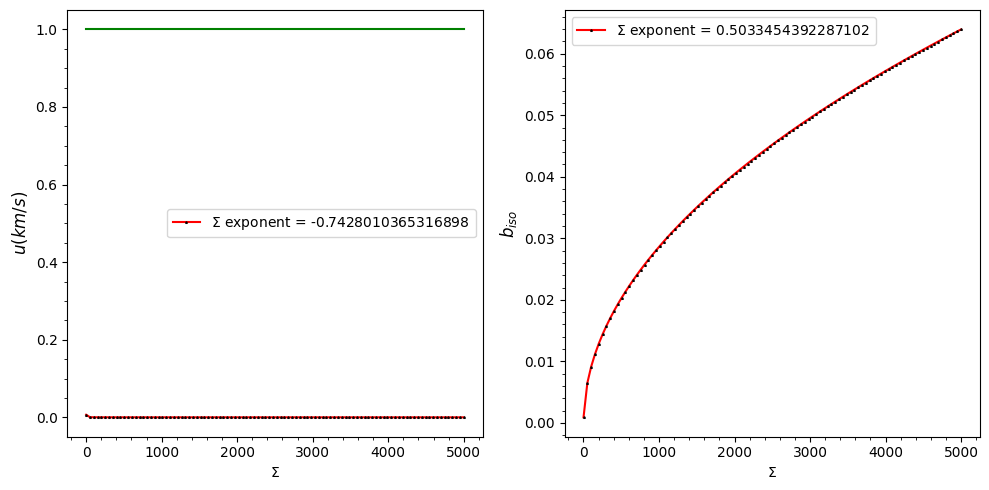

In [40]:
fig, ax = plt.subplots(1,2,figsize=(10, 5), tight_layout=True)
ax[0].plot(zr, quan_f2, color='r', marker='^', linestyle='-', mfc='k', mec='k',
         markersize=1.2, label=r'$'+str(latex(observable))+r'$ exponent = ' + str(coeff2))
ax[0].plot(zr, np.ones(len(zr)), color='g')
# ax[0].plot(kpc_radius, kms_dat_v, marker='o',markersize=1.2,c='tab:orange',mfc='k',mec='k', label = 'Velocity dispersion data')
# ax[0].yscale('log')
# ax[0].xscale('log')
ax[0].set_xlabel(r'$'+str(latex(observable))+r'$')
ax[0].set_ylabel(r'$u(km/s)$', size='large')
# ax[0].title('Scaling relation convergence at T = '+ "{:e}".format((round(t[0],2))))
ax[0].legend()
# ax[0].savefig('t_'+str(t[0])+'.png')

ax[1].plot(zr, quan_f, color='r', marker='^', linestyle='-', mfc='k', mec='k',
         markersize=1.2, label=r'$'+str(latex(observable))+r'$ exponent = ' + str(coeffg))

# ax[1].plot(kpc_radius, kms_dat_v, marker='o',markersize=1.2,c='tab:orange',mfc='k',mec='k', label = 'Velocity dispersion data')
# ax[1].yscale('log')
# ax[1].xscale('log')
ax[1].set_xlabel(r'$'+str(latex(observable))+r'$')
ax[1].set_ylabel(r'$b_{iso}$', size='large')
# ax[1].title('Scaling relation convergence at T = '+ "{:e}".format((round(t[0],2))))
ax[1].legend()
# ax[1].savefig('t_'+str(t[0])+'.png')



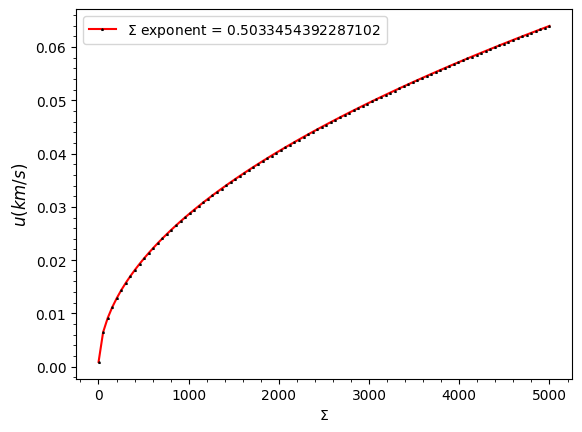

In [28]:
ax[1].plot(zr, quan_f, color='r', marker='^', linestyle='-', mfc='k', mec='k',
         markersize=1.2, label=r'$'+str(latex(observable))+r'$ exponent = ' + str(coeffg))

# ax[1].plot(kpc_radius, kms_dat_v, marker='o',markersize=1.2,c='tab:orange',mfc='k',mec='k', label = 'Velocity dispersion data')
# ax[1].yscale('log')
# ax[1].xscale('log')
ax[1].xlabel(r'$'+str(latex(observable))+r'$')
ax[1].ylabel(r'$u(km/s)$', size='large')
# ax[1].title('Scaling relation convergence at T = '+ "{:e}".format((round(t[0],2))))
ax[1].legend()
# ax[1].savefig('t_'+str(t[0])+'.png')

ax[1].show()

In [ ]:
plt.plot(kpc_r, (((np.pi**2)*datamaker((tau*u**2)/3, ca, rk, data_pass,
         h_f, tau_f)*(np.sqrt(dkdc_f)-1)/(4*h_f**2))**(-1))/(1e+6*365*24*60*60))


TypeError: datamaker() takes from 3 to 4 positional arguments but 6 were given

In [ ]:
dkdc_f-1


array([0.35630822, 0.54776305, 1.15938873, 0.96515082, 1.22015011,
       1.34031505, 1.29906639, 0.92379622, 0.64058712, 0.69992285,
       0.62058996, 0.51582201, 0.32914464, 0.23869387, 0.31333685,
       0.3637726 , 0.28607303, 0.08477462, 0.46956468, 1.63392147,
       3.25982832, 6.12218985])

In [ ]:
kms_sigmaLOS = np.array([17.10, 8.58, 12.94, 17.12, 12.99, 10.03, 13.13, 15.38, 16.60, 14.95, 15.63, 14.50, 12.63, 12.25, 12.57, 12.51, 13.53, 13.79, 13.93, 13.21, 11.56, 10.87, 10.81, 11.06, 11.77, 11.12, 12.21, 12.12, 12.12, 11.70, 11.41, 11.70, 12.54, 12.15, 11.65, 11.18, 11.21, 11.36, 11.72, 10.62, 10.23, 10.47, 10.62, 10.65, 9.76, 10.82,
                        11.45, 10.92, 10.91, 10.46, 10.01, 10.04, 9.86, 9.94, 10.17, 9.86, 9.55, 9.72, 9.79, 10.15, 9.82, 9.76, 9.86, 9.37, 9.73, 9.58, 9.66, 10.21, 10.21, 9.20, 8.95, 9.59, 10.20, 8.94, 9.01, 9.12, 9.29, 9.46, 9.80, 8.34, 9.01, 8.46, 8.98, 7.70, 7.99, 7.04, 6.43, 5.80, 8.92, 8.76, 6.95, 6.81, 6.60, 9.30, 13.69, 11.38, 6.81, 4.58, 9.05, 10.89])
arcsec_r = np.array([100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0, 4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0, 4900.0, 5000.0,
                    5100.0, 5200.0, 5300.0, 5400.0, 5500.0, 5600.0, 5700.0, 5800.0, 5900.0, 6000.0, 6100.0, 6200.0, 6300.0, 6400.0, 6500.0, 6600.0, 6700.0, 6800.0, 6900.0, 7000.0, 7100.0, 7200.0, 7300.0, 7400.0, 7500.0, 7600.0, 7700.0, 7800.0, 7900.0, 8000.0, 8100.0, 8200.0, 8300.0, 8400.0, 8500.0, 8600.0, 8700.0, 8800.0, 8900.0, 9000.0, 9100.0, 9200.0, 9300.0, 9400.0, 9500.0, 9600.0, 9700.0, 9800.0, 9900.0, 10000.0])

kpc_gal_dist = 780e0  # from Beck et al
kpc_radius = kpc_gal_dist*np.pi/(180*(60*60))*arcsec_r
kms_dat_v = np.sqrt(3)*kms_sigmaLOS


In [ ]:
plt.plot(kpc_r, h_f/pcm, c='r', linestyle='--', mfc='k',
         mec='k', marker='o', label=r'Model results $h(pc)$')
plt.plot(kpc_dat_r, pc_dat_h, c='b', linestyle='--', mfc='k', mec='k',
         marker='o', label=r'Data from Chamandy et.al.(16) $h(pc)$')
plt.xlabel('Radius(kpc)')
plt.ylabel(r'Variation of Scale height $h$ (parsecs)')


NameError: name 'pcm' is not defined

In [ ]:
# arcmin_r_Kam = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96])

# kms_sigmaLOS_Kam = np.array([10.7, 9.5, 9.3, 9.6, 10.0, 10.1, 9.1, 8.2, 8.0, 8.4, 7.9, 8.0, 7.6, 7.6, 8.0, 8.9, 9.8, 10.2, 10.3, 10.5, 9.5, 8.8, 9.1, 9.0, 8.5, 8.2, 8.3, 7.6, 7.7, 6.8, 7.4, 7.5, 6.7, 6.6, 6.4, 8.0, 8.2, 6.5, 6.5, 7.4, 6.5, 5.6, 6.1, 5.7, 5.7, 5.6, 6.4, 7.5])

# kpc_radius = arcmin_r_Kam*(np.pi/(180*60))*840e0

# kms_dat_v = np.sqrt(3)*kms_sigmaLOS_Kam


In [ ]:
plt.plot(kpc_r, u_f/kms, color='y', marker='o', label=r'$u_{gen}$')

plt.plot(exp_analytical_data(cs, ca, rk, data_pass) /
         kms, color='g', linestyle='-', label=r'$c_s$')
plt.plot(kpc_radius, kms_dat_v, marker='o', markersize=1.2,
         c='tab:orange', mfc='k', mec='k', label='Velocity dispersion data')
plt.xlabel('Radius(kpc)')
plt.ylabel(r'$u(km/s)$', size='large')
plt.legend()


NameError: name 'kms' is not defined

AttributeError: module 'turbulence_expressions' has no attribute 'mean'

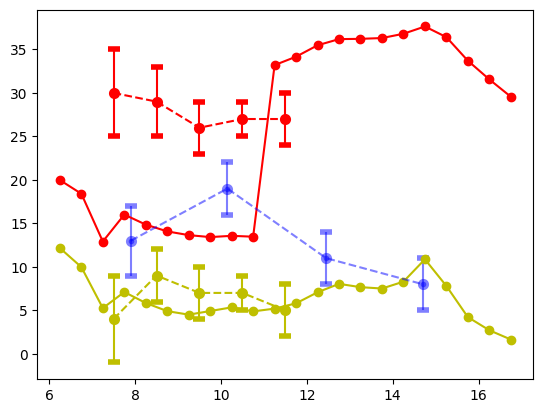

In [ ]:
pB = np.arctan(-tanpB_f)
pbb = np.arctan(tanpb_f)
pbo = (1/2)*((1+(2*Bbar_f*bani_f*np.cos(pbb-pB))/(bani_f**2+Bbar_f**2))*np.arctan((Bbar_f*np.sin(pB) + bani_f*np.sin(pbb))/((Bbar_f*np.cos(pB)) + bani_f*np.cos(pbb)))
             + (1-(2*Bbar_f*bani_f*np.cos(pbb-pB))/(bani_f**2+Bbar_f**2))*np.arctan((Bbar_f*np.sin(pB) - bani_f*np.sin(pbb))/((Bbar_f*np.cos(pB)) - bani_f*np.cos(pbb))))

i = 0
plt.errorbar(mrange, 180*M_dat_pb/np.pi, yerr=180*err_M_dat_pb/np.pi, ms=4, mew=4, capsize=4,
             c='b', linestyle='--', marker='o', label=r'Data $p_{B}$ (mean field)(M)', alpha=0.5)
plt.errorbar(rmrange, 180*RM_dat_pb/np.pi, yerr=180*err_RM_dat_pb/np.pi, ms=4, mew=4,
             capsize=4, c='y', linestyle='--', marker='o', label=r'Data $p_{B}$ (mean field)(RM)')
plt.errorbar(rmrange, 180*RM_dat_po/np.pi, yerr=180*err_RM_dat_po/np.pi, ms=4, mew=4,
             capsize=4, c='r', linestyle='--', marker='o', label=r'Data $p_{o}$ (ordered field)(RM)')

plt.plot(kpc_r, 180*pB/np.pi, c='y', linestyle='-', marker='o',
         label=r'Model results $p_{B}$ (mean field)')
# plt.plot(kpc_r, 180*pbb/np.pi,c = 'r',linestyle='--', marker='o',label = r'Model results $p_{b}$ (anisotropic field)')
plt.plot(kpc_r, 180*pbo/np.pi, c='r', linestyle='-', marker='o',
         label=r'Model results $p_{o}$ (ordered field)')

plt.title(r'mean $T = $ '+str(t.mean()))
plt.xlabel('Radius(kpc)')
plt.ylabel('Polarisation Angle $p_{B}$ (degrees)')
plt.legend()


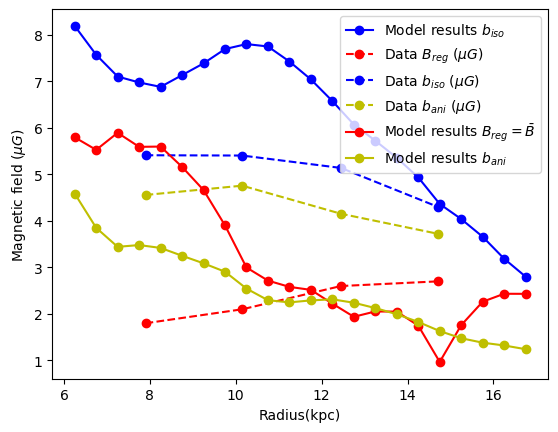

In [ ]:
plt.plot(kpc_r, biso_f*1e+6, c='b', linestyle='-',
         marker='o', label=r'Model results $b_{iso}$')

plt.plot(mrange, G_dat_Breg, c='r', linestyle='--',
         marker='o', label=r'Data $B_{reg}$ ($\mu G$)')
plt.plot(mrange, np.sqrt(G_dat_Btot**2 - G_dat_Bord**2), c='b',
         linestyle='--', marker='o', label=r'Data $b_{iso}$ ($\mu G$)')
plt.plot(mrange, np.sqrt(G_dat_Bord**2 - G_dat_Breg**2), c='y',
         linestyle='--', marker='o', label=r'Data $b_{ani}$ ($\mu G$)')


plt.plot(kpc_r, Bbar_f*1e+6, c='r', linestyle='-', marker='o',
         label=r'Model results $B_{reg} = \bar{B}$')

plt.plot(kpc_r, bani_f*1e+6, c='y', linestyle='-',
         marker='o', label=r'Model results $b_{ani}$')
plt.xlabel('Radius(kpc)')
plt.ylabel('Magnetic field ($\mu G$)')
plt.legend()


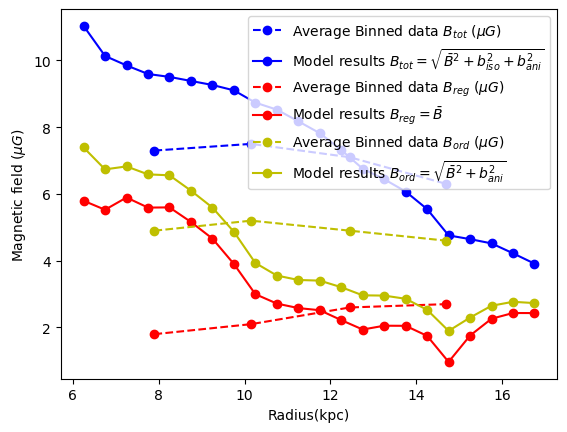

In [ ]:
G_scal_Bbartot = np.sqrt(biso_f**2 + bani_f**2 + Bbar_f**2)
G_scal_Bbarreg = Bbar_f
G_scal_Bbarord = np.sqrt(bani_f**2 + Bbar_f**2)
plt.plot(mrange, G_dat_Btot, c='b', linestyle='--', marker='o',
         label='Average Binned data $B_{tot}$ ($\mu G$)')
plt.plot(kpc_r, G_scal_Bbartot*1e+6, c='b', linestyle='-', marker='o',
         label=r'Model results $B_{tot}=\sqrt{\bar{B}^2+b_{iso}^2+b_{ani}^2}$')

plt.plot(mrange, G_dat_Breg, c='r', linestyle='--', marker='o',
         label='Average Binned data $B_{reg}$ ($\mu G$)')
plt.plot(kpc_r, G_scal_Bbarreg*1e+6, c='r', linestyle='-',
         marker='o', label=r'Model results $B_{reg} = \bar{B}$')

plt.plot(mrange, G_dat_Bord, c='y', linestyle='--', marker='o',
         label='Average Binned data $B_{ord}$ ($\mu G$)')
plt.plot(kpc_r, G_scal_Bbarord*1e+6, c='y', linestyle='-', marker='o',
         label=r'Model results $B_{ord} = \sqrt{\bar{B}^2+b_{ani}^2}$')

plt.xlabel('Radius(kpc)')
plt.ylabel('Magnetic field ($\mu G$)')
plt.legend()


In [ ]:
180*pog/np.pi


array([17.10872309, 16.6693064 , 13.90664658, 15.37558782, 14.77662772,
       15.28096978, 16.32666367, 18.39135345, 21.45034832, 22.93327596,
       23.38556229, 23.3155181 , 23.82028932, 24.57093605, 24.68974356,
       25.10401924, 26.40626077, 28.74918458, 27.58292391, 25.69996882,
       24.50384709, 24.0702038 ])

In [ ]:
from scipy.integrate import quad


def pogen(b, B, pb, pB, s):
    return (np.exp(-b**2/(2*s**2))/(np.sqrt(2*(np.pi))*s))*(1+(2*B*b*np.cos(pb-pB))/(b**2 + B**2))*np.arctan((B*np.sin(pB) + b*np.sin(pb))/((B*np.cos(pB)) + b*np.cos(pb)))


In [ ]:
brms = np.sqrt(np.average(bani_f**2))
brms


6.234482757771997e-07

In [ ]:
interval = 1e+3
pog = np.array([quad(pogen, -interval, interval, args=(Bbar_f[i], pbb[i], pB[i], brms),
               points=[-interval*brms, interval*brms])[0] for i in range(len(kpc_r))])


In [ ]:
180*pbo/np.pi


array([19.97429604, 18.40468063, 12.91234511, 16.00655662, 14.85539118,
       14.07450688, 13.64611231, 13.42008713, 13.56679508, 13.46584153,
       33.20045325, 34.16796195, 35.47866452, 36.18828326, 36.21986174,
       36.31129539, 36.80344733, 37.64195469, 36.41721606, 33.70367592,
       31.55444822, 29.56473929])

AttributeError: module 'turbulence_expressions' has no attribute 'mean'

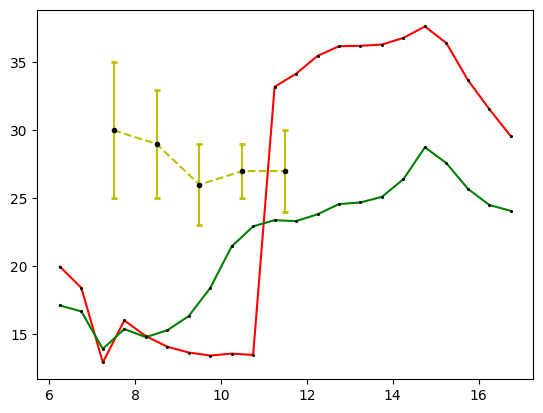

In [ ]:
pbo = (1/2)*((1+(2*Bbar_f*bani_f*np.cos(pbb-pB))/(bani_f**2+Bbar_f**2))*np.arctan((Bbar_f*np.sin(pB) + bani_f*np.sin(pbb))/((Bbar_f*np.cos(pB)) + bani_f*np.cos(pbb)))
             + (1-(2*Bbar_f*bani_f*np.cos(pbb-pB))/(bani_f**2+Bbar_f**2))*np.arctan((Bbar_f*np.sin(pB) - bani_f*np.sin(pbb))/((Bbar_f*np.cos(pB)) - bani_f*np.cos(pbb))))


plt.errorbar(rmrange, 180*RM_dat_po/np.pi, yerr=180*err_RM_dat_po/np.pi, ms=2, mew=2, capsize=2,
             c='y', linestyle='--', marker='o', mfc='k', mec='k', label=r'Data $p_{o}$ (ordered field)(RM)')


plt.plot(kpc_r, 180*pbo/np.pi, c='r', linestyle='-', marker='o', mfc='k',
         mec='k', markersize=1.2,  label=r'Model results $p_{o}$ (Normal sum)')
plt.plot(kpc_r, 180*pog/np.pi, c='g', linestyle='-', marker='o', mfc='k', mec='k',
         markersize=1.2, label=r'Model results $p_{o}$ ( Gaussian Integration)')


plt.title(r'mean $T = $ '+str(t.mean()))
plt.xlabel('Radius(kpc)')
plt.ylabel('Polarisation Angle $p_{B}$ (degrees)')
plt.legend()
# plt.savefig('pogrv'+str(ca)+'rk_'+str(rk)+ 't_'+str(t.mean())+'z_'+str(z[0])+'psi_'+str(p[0])+'f_'+str(b[0])+'.png')


In [ ]:
# m = 2
# fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10, 10), tight_layout=True)
# i = 0
# j = 0
# ax[i][j].plot(kpc_r, h_f/pcm,c = 'r',linestyle='--',mfc='k',mec='k',markersize=m, marker='o',label = r'Model results without $H_2$ $h(pc)$')
# ax[i][j].plot(kpc_r, h_f2/pcm,c = 'g',linestyle='--',mfc='k',mec='k',markersize=m, marker='o',label = r'Model results with $H_2$ $h(pc)$')

# ax[i][j].plot(kpc_dat_r, pc_dat_h,c = 'b',linestyle='--',mfc='k',mec='k',markersize=m, marker='o',label = r'Data from Chamandy et.al.(16) $h(pc)$')
# ax[i][j].set_xlabel('Radius(kpc)')
# ax[i][j].set_ylabel(r'Variation of Scale height $h$ (parsecs)')
# ax[i][j].legend()


# j = 1
# ax[i][j].plot(kpc_r, u_f/kms,color = 'y', marker='o',mfc='k',mec='k',markersize=m, label = r'$u_{gen}$ without $H_2$')
# ax[i][j].plot(kpc_r, u_f2/kms,color = 'b', marker='o',mfc='k',mec='k',markersize=m, label = r'$u_{gen}$ with $H_2$')

# #ax[i][j].plot(kpc_r, np.sqrt(u_f**2 + np.float64(exp_analytical_data(cs, ca, rk, data_pass))**2)/kms,color = 'r', marker='o',mfc='k',mec='k',markersize=m, label = r'$\sqrt{u^2+c_s^2}$')
# ax[i][j].plot(exp_analytical_data(cs, ca, rk, data_pass)/kms, color = 'g', linestyle = '-', label = r'$c_s$')
# ax[i][j].plot(kpc_radius, kms_dat_v, marker='o',markersize=m,c='tab:orange',mfc='k',mec='k', label = 'Velocity dispersion data')
# ax[i][j].set_xlabel('Radius(kpc)')
# ax[i][j].set_ylabel(r'$u(km/s)$', size='large')
# ax[i][j].legend()

# i = 1
# G_scal_Bbartot = np.sqrt(biso_f**2 + bani_f**2 + Bbar_f**2)
# G_scal_Bbarreg = Bbar_f
# G_scal_Bbarord = np.sqrt(bani_f**2 + Bbar_f**2)
# ax[i][j].plot(mrange, G_dat_Btot, c = 'b',linestyle='--', marker='o', mfc='k',mec='k',markersize=m,label = 'Average Binned data $B_{tot}$ ($\mu G$)')
# ax[i][j].plot(kpc_r, G_scal_Bbartot*1e+6,c = 'b',linestyle='-', marker='o',mfc='k',mec='k',markersize=m,label = r'Model results $B_{tot}=\sqrt{\bar{B}^2+b_{iso}^2+b_{ani}^2}$')

# ax[i][j].plot(mrange, G_dat_Breg, c = 'r',linestyle='--', marker='o',mfc='k',mec='k',markersize=m, label = 'Average Binned data $B_{reg}$ ($\mu G$)')
# ax[i][j].plot(kpc_r, G_scal_Bbarreg*1e+6,c = 'r',linestyle='-', marker='o',mfc='k',mec='k',markersize=m,label = r'Model results $B_{reg} = \bar{B}$')

# ax[i][j].plot(mrange, G_dat_Bord, c = 'y',linestyle='--', marker='o',mfc='k',mec='k',markersize=m, label = 'Average Binned data $B_{ord}$ ($\mu G$)')
# ax[i][j].plot(kpc_r, G_scal_Bbarord*1e+6,c = 'y',linestyle='-', marker='o',mfc='k',mec='k',markersize=m,label = r'Model results $B_{ord} = \sqrt{\bar{B}^2+b_{ani}^2}$')

# ax[i][j].set_xlabel('Radius(kpc)')
# ax[i][j].set_ylabel('Magnetic field ($\mu G$)')
# ax[i][j].legend()
# # ax[i][j].plot(kpc_r, biso_f*1e+6,c = 'b',linestyle='-', marker='o',markersize=m,label = r'Model results $b_{iso}$')

# # ax[i][j].plot(mrange, G_dat_Breg, c = 'r',linestyle='--', marker='o',mfc='k',mec='k',markersize=m, label = r'Data $B_{reg}$ ($\mu G$)')
# # ax[i][j].plot(mrange, np.sqrt(G_dat_Btot**2 - G_dat_Bord**2), c = 'b',mfc='k',mec='k',markersize=m,linestyle='--', marker='o', label = r'Data $b_{iso}$ ($\mu G$)')
# # ax[i][j].plot(mrange, np.sqrt(G_dat_Bord**2 - G_dat_Breg**2), c = 'y',mfc='k',mec='k',markersize=m,linestyle='--', marker='o', label = r'Data $b_{ani}$ ($\mu G$)')
# # ax[i][j].plot(kpc_r, Bbar_f*1e+6,c = 'r',linestyle='-', marker='o',mfc='k',mec='k',markersize=m,label = r'Model results $B_{reg} = \bar{B}$')
# # ax[i][j].plot(kpc_r, bani_f*1e+6,c = 'y',linestyle='-', marker='o',mfc='k',mec='k',markersize=m,label = r'Model results $b_{ani}$')
# # ax[i][j].set_xlabel('Radius(kpc)')
# # ax[i][j].set_ylabel('Magnetic field ($\mu G$)')
# # ax[i][j].legend()

# j = 0
# pB = np.arctan(-tanpB_f)
# pbb = np.arctan(tanpb_f)
# pbo = (1/2)*((1+(2*Bbar_f*bani_f*np.cos(pbb-pB))/(bani_f**2+Bbar_f**2))*np.arctan((Bbar_f*np.sin(pB) + bani_f*np.sin(pbb))/((Bbar_f*np.cos(pB)) + bani_f*np.cos(pbb)))
#              +(1-(2*Bbar_f*bani_f*np.cos(pbb-pB))/(bani_f**2+Bbar_f**2))*np.arctan((Bbar_f*np.sin(pB) - bani_f*np.sin(pbb))/((Bbar_f*np.cos(pB)) - bani_f*np.cos(pbb))))

# #ax[i][j].errorbar(mrange, 180*M_dat_pb/np.pi, yerr = 180*err_M_dat_pb/np.pi, ms=4, mew=2, capsize=2, c = 'b',linestyle='--', marker='o',mfc='k',mec='k', label = r'Data $p_{B}$ (mean field)(M)', alpha = 0.5)
# ax[i][j].errorbar(rmrange, 180*RM_dat_pb/np.pi, yerr = 180*err_RM_dat_pb/np.pi, ms=2, mew=2, capsize=2,c = 'r',linestyle='--', marker='o',mfc='k',mec='k', label = r'Data $p_{B}$ (mean field)(RM)')
# ax[i][j].errorbar(rmrange, 180*RM_dat_po/np.pi, yerr = 180*err_RM_dat_po/np.pi, ms=2, mew=2, capsize=2,c = 'y',linestyle='--', marker='o',mfc='k',mec='k', label = r'Data $p_{o}$ (ordered field)(RM)')

# ax[i][j].plot(kpc_r, 180*pB/np.pi,c = 'r',linestyle='-', marker='o',markersize=m,mfc='k',mec='k',label = r'Model results $p_{B}$ (mean field)')
# #ax[i][j].plot(kpc_r, 180*pbb/np.pi,c = 'r',linestyle='--', marker='o',label = r'Model results $p_{b}$ (anisotropic field)')
# ax[i][j].plot(kpc_r, 180*pbo/np.pi,c = 'y',linestyle='-',mfc='k',markersize=m,mec='k', marker='o',label = r'Model results $p_{o}$ (ordered field)')

# ax[i][j].set_xlabel('Radius(kpc)')
# ax[i][j].set_ylabel('Polarisation Angle $p_{B}$ (degrees)')
# ax[i][j].legend()
# fig.suptitle(r'mean $T = $ '+str(t.mean()))
# #plt.savefig('compareH2_ca_'+str(ca)+'rk_'+str(rk)+ 't_'+str(t.mean())+'z_'+str(z[0])+'psi_'+str(p[0])+'f_'+str(b[0])+'.png')


In [ ]:
dictionary = {'geek': 1, 'supergeek': True, 4: 'geeky'}
  
try:
    geeky_file = open('geekyfile.txt', 'a')
    geeky_file.write(str(dictionary))
    geeky_file.close()
  
except:
    print("Unable to append to file")

In [ ]:
from collections import defaultdict
from pprint import pprint

store = {}#defaultdict(list)

with open('parameter_file.dat', 'r') as FH:
    for file in FH.readlines():
        line = file.strip()
        try:
            name,phone = line.split('=')
        except ValueError:
            print ("Record: ", line)
            raise Exception("Failed while unpacking. Not enough arguments to supply.")
        store[name]  = float(phone[-1])

pprint(store['ca '])

2.0


In [ ]:
bool('True')

True

(1.5, 0.75, 0.4, 0.85, 0.008, 1.0, 1.0)